# bank client data:
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>

# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') <br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). <br>
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric) <br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) <br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

# Output variable:
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')<br>



In [2]:
import pandas as pd
from pandas import Series
from pandas import DataFrame

In [3]:
import matplotlib.pyplot as plt

In [4]:
# matplotlib 한글 폰트 출력코드
# 출처 : 데이터공방( https://kiddwannabe.blog.me)

import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':    
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
        mily='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

In [ ]:
#engine='python' - 에러 반환시, 디렉토리 혹은 파일명에 한글이 있을 경우 추가
df=pd.read_csv('C:\\Users\\bank-additional-full.csv',
                 engine='python')

In [ ]:
#window
#sep = ';'
df=pd.read_csv('C:/Users/bank-additional-full.csv',
                 engine='python',sep=';')

In [11]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
#head - 데이터의 첫 5행, default : 5행
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [16]:
#tail - 데이터의 끝 5행, default : 5행
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [17]:
df.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


# 결측치 확인

In [18]:
# 결측치 확인
df.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
# 결측치 확인 - 열단위
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [20]:
#shape - dataframe의 크기(행, 열의 수)
df.shape

(41188, 21)

In [21]:
#describe() - 열에 대한 기술통계량
#데이터의 수, 평균, 표준편차, 최소값, 1사분위수, 2사분위수, 3사분위수, 최대값
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [22]:
#columns - 칼럼명 반환
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [23]:
#unique() - 열의 고유값
#education
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [24]:
#value_counts() - 열의 고유값 빈도
#education
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [25]:
#unique() - 열의 고유값
#marital
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [26]:
#value_counts() - 열의 고유값 빈도
#marital
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

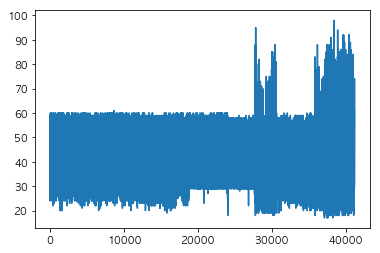

In [28]:
df['age'].plot()
plt.show()
#x축이 인덱스 순서

- age 칼럼 선그래프 그리기(오름차순)
 1. 노출수칼럼을 수치 순서대로 오름차순 정렬
 2. 정렬된 데이터(시리즈)의 형태대로 인덱스 재생성 

In [29]:
#오름차순 정렬
#age칼럼 
age=df['age'].sort_values()

In [30]:
#age변수출력
age

38274    17
37579    17
37539    17
37140    17
37558    17
38832    18
24110    18
37626    18
27792    18
37955    18
39036    18
41084    18
35871    18
37917    18
40379    18
39039    18
30349    18
39576    18
41088    18
39057    18
38009    18
39610    18
39593    18
39903    18
35872    18
38597    18
30142    18
40383    18
37125    18
37934    18
         ..
38410    88
37472    88
30430    88
38415    88
27813    88
27812    88
27811    88
27810    88
37775    88
27818    88
27817    88
27816    88
27808    88
27805    88
27815    88
27802    88
27800    88
27814    88
39847    89
40639    89
38022    91
38032    91
39734    92
39655    92
40469    92
40450    92
38921    94
27826    95
38455    98
38452    98
Name: age, Length: 41188, dtype: int64

In [31]:
#reset_index - 인덱스 재생성, 기존 인덱스를 데이터프레임의 열로 반환
age=age.reset_index()

In [32]:
#age 변수출력
age

,index,age
0,38274,17
1,37579,17
2,37539,17
3,37140,17
4,37558,17
5,38832,18
6,24110,18
7,37626,18
8,27792,18
9,37955,18


In [33]:
#drop(axis=1) - 삭제(열 기준)
age=age.drop('index',axis=1)

In [34]:
#age 변수출력
age

,age
0,17
1,17
2,17
3,17
4,17
5,18
6,18
7,18
8,18
9,18


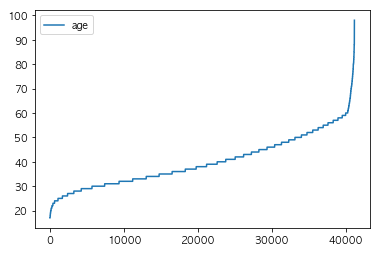

In [35]:
#plotting
age.plot()
plt.show()
#값의 오름차순별로 정렬한 그래프
#보통 '나이'를 20대,30대,40..대로 나누어 데이터를 확인함

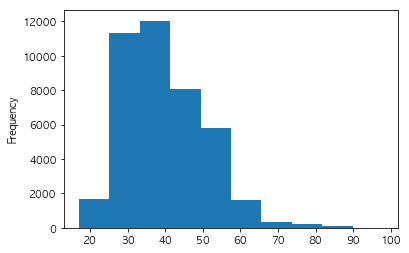

In [36]:
#계급간 빈도를 나타내주는 히스토그램
df['age'].plot.hist()
plt.show()

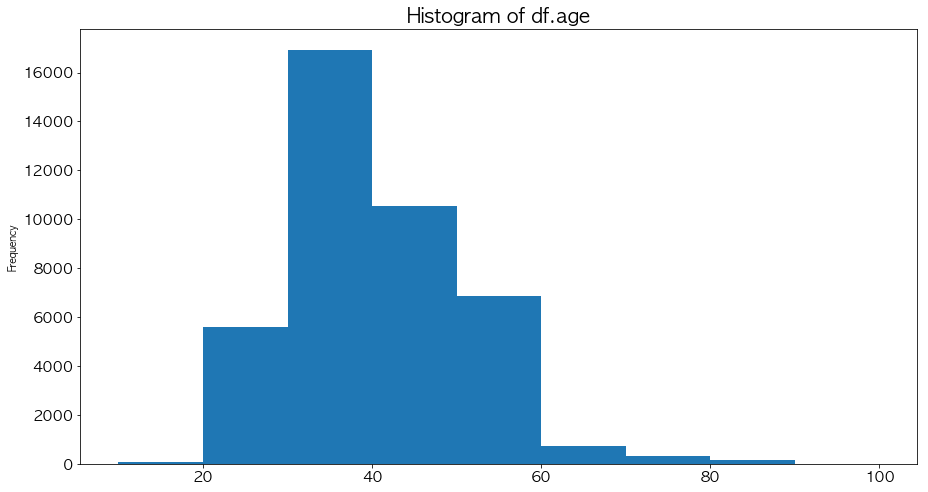

In [37]:
#히스토그램
#bins - 계급구간(10,20,30...100)
#figsize=[15,8]
#xticks(fontsize=15)
#yticks(fontsize=15)
#plt.title('Histogram of df.age',fontsize=20)

df['age'].plot.hist(bins=range(10,101,10),figsize=[15,8])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Histogram of df.age',fontsize=20)
plt.show()

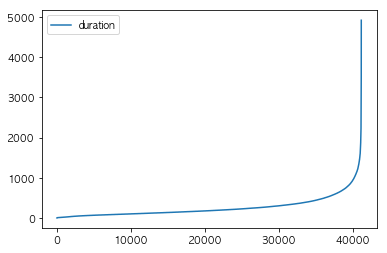

In [38]:
#시각화 예제2 : duration(전화통화시간) 선 그래프 시각화
(((df['duration'].sort_values()).reset_index()).drop('index',axis=1)).plot()
plt.show()
#1. 선그래프로 데이터의 패턴 분석
#2. 히스토그램으로 전화통화 시간별 빈도 분석

In [39]:
#히스토그램의 계급구간을 설정하기 위한 최소값, 최대값 파악
#describe()
df['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

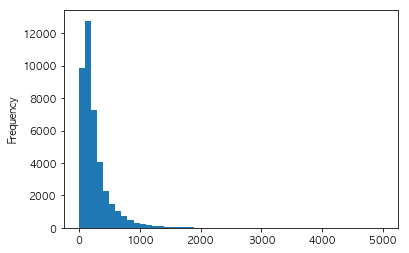

In [40]:
#bins=range(0,5001,100)
df['duration'].plot.hist(bins=range(0,5001,100))
plt.show()

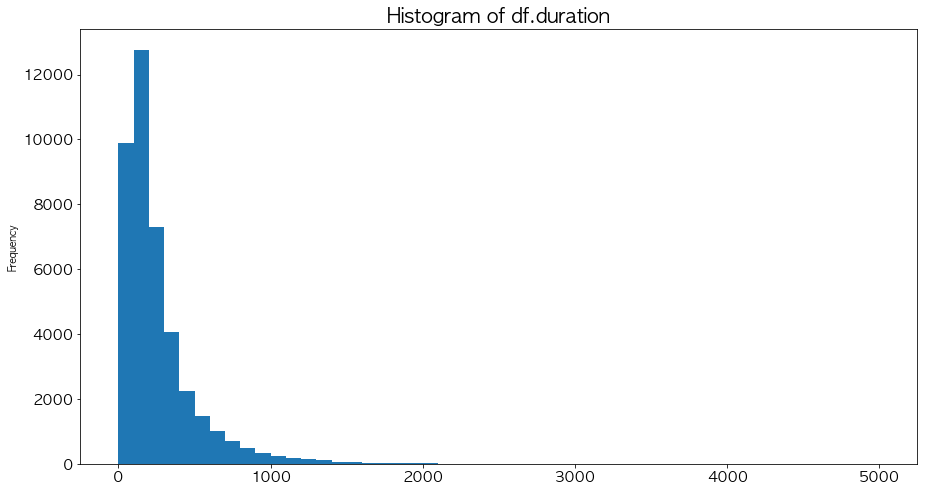

In [41]:
#히스토그램
#bins - 계급구간(0,100,200...5000)
#figsize=[15,8]
#xticks(fontsize=15)
#yticks(fontsize=15)
#plt.title('Histogram of df.duration',fontsize=20)

df['duration'].plot.hist(bins=range(0,5001,100), figsize=[15,8])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Histogram of df.duration',fontsize=20)
plt.show()

# 막대그래프, 가로막대그래프

In [1]:
#선그래프
#marital
df['marital'].plot()
plt.show()
#no numeric data to plot

NameError: name 'df' is not defined

In [43]:
#히스토그램
df['marital'].plot.hist()
#no numeric data to plot

TypeError: Empty 'DataFrame': no numeric data to plot

In [45]:
#unique()함수를 사용한 age칼럼 고유값 확인 
df['age'].unique()
#선그래프를 그린 age칼럼 데이터는 수치데이터

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

In [46]:
#unique()함수를 사용한 marital칼럼 고유값 확인 
df['marital'].unique()
#marital칼럼의 데이터는 문자

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

- 막대그래프를 통한 시각화
 1. value_counts
 2. 막대그래프 시각화

In [48]:
#1. value_counts()
#marital
marital=df['marital'].value_counts()

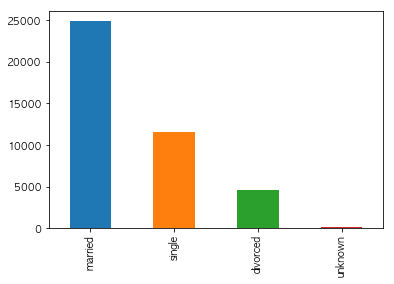

In [49]:
#2. marital변수 막대그래프 시각화
marital.plot.bar()
plt.show()

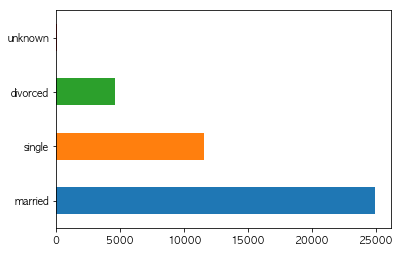

In [50]:
#2-1. 가로막대그래프 시각화
marital.plot.barh()
plt.show()

In [51]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [53]:
#education 가로막대그래프 한줄 코드
#value_counts(),plot.barh()
education=df['education'].value_counts()

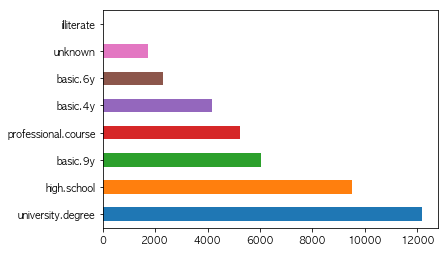

In [54]:
education.plot.barh()
plt.show()

# 데이터 분석

### 대출이 있는 사람이라면 은행 상품에 잘 가입하지 않을 것이다.

- 분석을 위한 코딩과정 도식화
 1. 가입여부에 따라 가입한 그룹과 가입하지 않은 그룹으로 나눈다.
 2. 나뉜 데이터를 대출여부에 따라 나눈다.
 3. 가입한 그룹 중 대출이 있는 사람의 비중과, 가입하지 않은 그룹 중 대출이 있는 사람의 비중을 비교한다.
 
 <br><br>


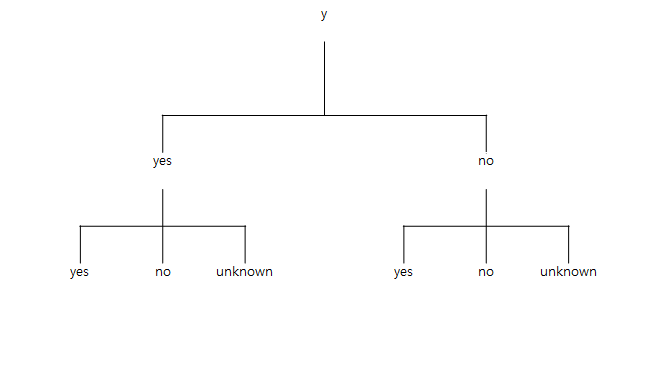

In [60]:
# 1. 가입여부에 따라 가입한 그룹과 가입하지 않은 그룹으로 나눈다.
#가입여부에 대한 칼럼 : 'y'
#unique()
df['y'].unique()
#groupby사용 - yes, no그룹으로 나뉘게 됨

array(['no', 'yes'], dtype=object)

In [61]:
# 1. 가입여부에 따라 가입한 그룹과 가입하지 않은 그룹으로 나눈다.
#groupby('y')
grouped=df.groupby('y')

In [62]:
# 1. 가입여부에 따라 가입한 그룹과 가입하지 않은 그룹으로 나눈다.
#get_group('yes') - y칼럼이 'yes'인 데이터프레임 추출 - 가입한 그룹만 추출
#get_group('no') - y칼럼이 'no'인 데이터프레임 추출 - 가입하지 않은 그룹만 추출
yes_group=grouped.get_group('yes')
no_group=grouped.get_group('no')

In [63]:
# 1. 가입여부에 따라 가입한 그룹과 가입하지 않은 그룹으로 나눈다.
#yes_group 출력
yes_group.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


In [64]:
# 1-3. 가입여부에 따라 가입한 그룹과 가입하지 않은 그룹으로 나눈다.
#no_group 출력
no_group.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [65]:
#2. 나뉜 데이터(yes_group,no_group)를 대출여부(loan)에 따라 나눈다.
#value_counts
yes=yes_group['loan'].value_counts()

In [66]:
#yes변수 출력
yes
#yes_group의 대출여부 빈도 출력

no         3850
yes         683
unknown     107
Name: loan, dtype: int64

In [67]:
#2. 나뉜 데이터(yes_group,no_group)를 대출여부(loan)에 따라 나눈다.
#value_counts
no=no_group['loan'].value_counts()

In [68]:
#no변수 출력
no
#no_group의 대출여부 빈도 출력

no         30100
yes         5565
unknown      883
Name: loan, dtype: int64

In [69]:
#3. 가입한 그룹 내 대출이 있는 사람의 비중과, 가입하지 않은 그룹 내 대출이 있는 사람의 비중을 비교한다(yes_group).
#비중 : 시리즈 변수 각각의 value를 시리즈의 총합으로 나눔
#시리즈는 산술연산자(+,-,*,/,%,**,//)와 함께 사용가능
#series/series.sum()
yes=yes/yes.sum()

In [70]:
#yes 출력
yes

no         0.829741
yes        0.147198
unknown    0.023060
Name: loan, dtype: float64

In [71]:
#3. 가입한 그룹 내 대출이 있는 사람의 비중과, 가입하지 않은 그룹 내 대출이 있는 사람의 비중을 비교한다(no_group).
no=no/no.sum()

In [72]:
#no 출력
no

no         0.823574
yes        0.152266
unknown    0.024160
Name: loan, dtype: float64

In [73]:
#3. 가입한 그룹 중 대출이 있는 사람의 비중과, 가입하지 않은 그룹 중 대출이 있는 사람의 비중을 비교한다.
#concat : 시리즈 혹은 데이터프레임 결합(default-행방향 결합)
pd.concat([yes,no],axis=1)
#칼럼명이 모두 loan

,loan,loan
no,0.829741,0.823574
yes,0.147198,0.152266
unknown,0.023060,0.024160


In [74]:
#series.name : 시리즈의 이름 설정
yes.name='y_yes'

In [75]:
#series.name : 시리즈의 이름 설정
no.name='y_no'

In [77]:
pd.concat([yes,no],axis=1)
#=> 가입한 그룹의 대출 비중이 가입하지 않은 그룹보다 0.005 더 적다.

,y_yes,y_no
no,0.829741,0.823574
yes,0.147198,0.152266
unknown,0.023060,0.024160


# 분석주제 2 :
# 같은 상품을 새로운 고객에게 마케팅 하려고한다. 
# 연령과 상품가입여부, 직업을 함께 고려할때 마케팅 전략을 변화시켜야 할 그룹은?

- 분석조건 : 세 개의 칼럼(age, job, y)을 함께 분석해야 함 
- pd.pivot_table('데이터프레임 변수',values=집계 대상 칼럼(수치 데이터), index=행 인덱스가 될 칼럼명, columns=열 인덱스가 될 칼럼명, aggfunc=집계함수-sum,mean,min,max,std,var)

# pivot_table 사용예제

In [1]:
#pd.pivot_table('데이터프레임 변수',values=집계 대상 칼럼, index=행 인덱스가 될 칼럼명, columns=열 인덱스가 될 칼럼명, aggfunc=sum)
pd.pivot_table(df,values='age',index='y',columns='job',aggfunc='mean')

NameError: name 'pd' is not defined

In [93]:
#values,index,columns파라미터를 일일이 쓰지 않고 순서대로 입력하여 실행 가능
pd.pivot_table(df,'age','y','job',aggfunc='mean')

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,38.219846,39.582057,41.703453,44.705451,42.309707,59.926128,40.176887,38.090236,26.396667,38.600033,39.844828,45.375427
yes,37.968935,39.200627,41.935484,52.650943,42.783537,68.253456,38.006711,36.077399,24.800000,37.746575,39.062500,47.054054


In [94]:
#멀티 인덱스(multi-index) - 행 인덱스
#['y','marital']
pd.pivot_table(df,'age',['y','marital'],'job',aggfunc='mean')

job              admin.  blue-collar  entrepreneur  housemaid  management  \
y   marital                                                                 
no  divorced  43.098432    42.903704     44.042424  48.806897   46.123288   
    married   40.148663    40.857804     42.477111  44.849218   43.634997   
    single    33.858265    33.409255     35.472527  38.087379   34.070776   
    unknown   34.666667    42.818182     35.500000  40.000000   51.000000   
yes divorced  44.878788    42.037736     44.857143  57.000000   46.692308   
    married   41.386503    41.363420     43.090909  54.256757   44.756637   
    single    32.404594    32.652174     35.666667  40.875000   33.285714   
    unknown   42.500000    37.000000     31.000000        NaN         NaN   

job             retired  self-employed   services    student  technician  \
y   marital                                                                
no  divorced  61.480469      42.871795  41.991984  34.500000   42.173484   
    married   60.019048      42.349148  39.992951  30.484848   40.686245   
    single    53.938272      33.783537  32.159921  26.062500   33.950697   
    unknown   59.750000      39.400000  40.000000  30.000000   33.300000   
yes divorced  72.739130      41.875000  43.484848  35.666667   40.738462   
    married   67.033435      41.036585  38.379518  31.250000   41.398438   
    single    67.500000      31.921569  31.024194  24.481061   32.078853   
    unknown   66.000000            NaN        NaN        NaN   30.000000   

job           unemployed    unknown  
y   marital                          
no  divorced   42.140351  43.300000  
    married    41.636861  47.532110  
    single     33.536946  38.288136  
    unknown    47.200000  40.166667  
yes divorced   47.900000  76.333333  
    married    41.941860  58.750000  
    single     32.062500  30.000000  
    unknown          NaN  40.666667

In [95]:
#멀티 인덱스(multi-index) - 열 인덱스
#['job','contact']
pd.pivot_table(df,'age',['y','marital'],['job','contact'],aggfunc='mean')

job              admin.            blue-collar            entrepreneur  \
contact        cellular  telephone    cellular  telephone     cellular   
y   marital                                                              
no  divorced  43.143639  43.019185   42.906907  42.900585    43.301887   
    married   40.349554  39.800357   41.182477  40.494249    42.213628   
    single    33.515821  34.646707   32.872838  34.183554    36.181034   
    unknown   35.000000  31.000000   43.800000  42.000000    40.000000   
yes divorced  45.028302  44.269231   41.500000  43.400000    45.333333   
    married   41.362832  41.540230   41.682432  40.608000    44.177419   
    single    32.117284  34.150000   31.934426  34.897436    35.117647   
    unknown   42.500000        NaN   37.000000        NaN    31.000000   

job                      housemaid            management             \
contact       telephone   cellular  telephone   cellular  telephone   
y   marital                                                           
no  divorced  45.372881  48.292683  49.476190  44.786164  47.721805   
    married   42.802273  45.900966  43.342561  43.740678  43.452416   
    single    34.227273  36.827586  39.711111  33.747405  34.697987   
    unknown   31.000000  40.000000        NaN        NaN  51.000000   
yes divorced  44.000000  59.857143  37.000000  46.297297  54.000000   
    married   40.500000  55.375000  50.777778  45.401099  42.090909   
    single    38.000000  40.769231  41.333333  32.763636  36.875000   
    unknown         NaN        NaN        NaN        NaN        NaN   

job             ...       services               student             \
contact         ...       cellular  telephone   cellular  telephone   
y   marital     ...                                                   
no  divorced    ...      42.028269  41.944444  36.000000  27.000000   
    married     ...      40.483733  39.395833  32.150000  27.923077   
    single      ...      32.360927  31.863081  25.396509  27.742138   
    unknown     ...      34.500000  42.750000  30.000000        NaN   
yes divorced    ...      43.083333  44.555556  35.666667        NaN   
    married     ...      38.634921  37.575000  30.333333  34.000000   
    single      ...      30.846154  31.950000  24.174468  26.965517   
    unknown     ...            NaN        NaN        NaN        NaN   

job          technician            unemployed               unknown             
contact        cellular  telephone   cellular  telephone   cellular  telephone  
y   marital                                                                     
no  divorced  42.069034  42.435644  42.253731  41.978723  46.000000  40.600000  
    married   40.283568  41.365495  41.452769  41.871369  48.349057  46.758929  
    single    33.529248  35.008741  33.252101  33.940476  39.535714  37.161290  
    unknown   30.285714  40.333333  46.500000  50.000000  48.333333  32.000000  
yes divorced  40.701754  41.000000  51.000000  40.666667  76.333333        NaN  
    married   41.299065  41.904762  42.746479  38.133333  58.181818  60.000000  
    single    31.995902  32.657143  32.355556  27.666667  31.000000  28.000000  
    unknown   30.000000        NaN        NaN        NaN  45.000000  32.000000  

[8 rows x 24 columns]

In [96]:
#fill-value - 결측치 대체
#fill_value=0
pd.pivot_table(df,'age',['y','marital'],['job','contact'],aggfunc='mean',fill_value=0)

job              admin.            blue-collar            entrepreneur  \
contact        cellular  telephone    cellular  telephone     cellular   
y   marital                                                              
no  divorced  43.143639  43.019185   42.906907  42.900585    43.301887   
    married   40.349554  39.800357   41.182477  40.494249    42.213628   
    single    33.515821  34.646707   32.872838  34.183554    36.181034   
    unknown   35.000000  31.000000   43.800000  42.000000    40.000000   
yes divorced  45.028302  44.269231   41.500000  43.400000    45.333333   
    married   41.362832  41.540230   41.682432  40.608000    44.177419   
    single    32.117284  34.150000   31.934426  34.897436    35.117647   
    unknown   42.500000   0.000000   37.000000   0.000000    31.000000   

job                      housemaid            management             \
contact       telephone   cellular  telephone   cellular  telephone   
y   marital                                                           
no  divorced  45.372881  48.292683  49.476190  44.786164  47.721805   
    married   42.802273  45.900966  43.342561  43.740678  43.452416   
    single    34.227273  36.827586  39.711111  33.747405  34.697987   
    unknown   31.000000  40.000000   0.000000   0.000000  51.000000   
yes divorced  44.000000  59.857143  37.000000  46.297297  54.000000   
    married   40.500000  55.375000  50.777778  45.401099  42.090909   
    single    38.000000  40.769231  41.333333  32.763636  36.875000   
    unknown    0.000000   0.000000   0.000000   0.000000   0.000000   

job             ...       services               student             \
contact         ...       cellular  telephone   cellular  telephone   
y   marital     ...                                                   
no  divorced    ...      42.028269  41.944444  36.000000  27.000000   
    married     ...      40.483733  39.395833  32.150000  27.923077   
    single      ...      32.360927  31.863081  25.396509  27.742138   
    unknown     ...      34.500000  42.750000  30.000000   0.000000   
yes divorced    ...      43.083333  44.555556  35.666667   0.000000   
    married     ...      38.634921  37.575000  30.333333  34.000000   
    single      ...      30.846154  31.950000  24.174468  26.965517   
    unknown     ...       0.000000   0.000000   0.000000   0.000000   

job          technician            unemployed               unknown             
contact        cellular  telephone   cellular  telephone   cellular  telephone  
y   marital                                                                     
no  divorced  42.069034  42.435644  42.253731  41.978723  46.000000  40.600000  
    married   40.283568  41.365495  41.452769  41.871369  48.349057  46.758929  
    single    33.529248  35.008741  33.252101  33.940476  39.535714  37.161290  
    unknown   30.285714  40.333333  46.500000  50.000000  48.333333  32.000000  
yes divorced  40.701754  41.000000  51.000000  40.666667  76.333333   0.000000  
    married   41.299065  41.904762  42.746479  38.133333  58.181818  60.000000  
    single    31.995902  32.657143  32.355556  27.666667  31.000000  28.000000  
    unknown   30.000000   0.000000   0.000000   0.000000  45.000000  32.000000  

[8 rows x 24 columns]

# pivot_table를 사용한 주제2 분석
#### 같은 상품을 새로운 고객에게 마케팅 하려고한다. 
#### 연령과 상품가입여부, 직업을 함께 고려할때 마케팅 전략을 변화시켜야 할 그룹은?


In [97]:
#pivot_table
pivot=pd.pivot_table(df,values='age',index='y',columns='job',aggfunc='mean')

In [98]:
#pivot 변수 출력
pivot

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,38.219846,39.582057,41.703453,44.705451,42.309707,59.926128,40.176887,38.090236,26.396667,38.600033,39.844828,45.375427
yes,37.968935,39.200627,41.935484,52.650943,42.783537,68.253456,38.006711,36.077399,24.800000,37.746575,39.062500,47.054054


In [99]:
#yes행과 no행의 차 연산(loc인덱서 사용)
pivot.loc['yes']-pivot.loc['no']

job
admin.          -0.250911
blue-collar     -0.381430
entrepreneur     0.232030
housemaid        7.945493
management       0.473829
retired          8.327329
self-employed   -2.170175
services        -2.012836
student         -1.596667
technician      -0.853458
unemployed      -0.782328
unknown          1.678627
dtype: float64

In [100]:
#diff행 생성(yes행과 no행의 차)
pivot.loc['diff']=pivot.loc['yes']-pivot.loc['no']

In [101]:
#pivot 변수 출력
pivot

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,38.219846,39.582057,41.703453,44.705451,42.309707,59.926128,40.176887,38.090236,26.396667,38.600033,39.844828,45.375427
yes,37.968935,39.200627,41.935484,52.650943,42.783537,68.253456,38.006711,36.077399,24.800000,37.746575,39.062500,47.054054
diff,-0.250911,-0.381430,0.232030,7.945493,0.473829,8.327329,-2.170175,-2.012836,-1.596667,-0.853458,-0.782328,1.678627


In [105]:
#diff 기준으로 내림차순 정렬 
#sort_values() - default : 열 기준 오름차순 정렬
#axis=1,ascending=False : 행 기준 내림차순 정렬
result=pivot.sort_values('diff',axis=1,ascending=False)

In [106]:
#result 출력
result

job,retired,housemaid,unknown,management,entrepreneur,admin.,blue-collar,unemployed,technician,student,services,self-employed
y,,,,,,,,,,,,
no,59.926128,44.705451,45.375427,42.309707,41.703453,38.219846,39.582057,39.844828,38.600033,26.396667,38.090236,40.176887
yes,68.253456,52.650943,47.054054,42.783537,41.935484,37.968935,39.200627,39.062500,37.746575,24.800000,36.077399,38.006711
diff,8.327329,7.945493,1.678627,0.473829,0.232030,-0.250911,-0.381430,-0.782328,-0.853458,-1.596667,-2.012836,-2.170175


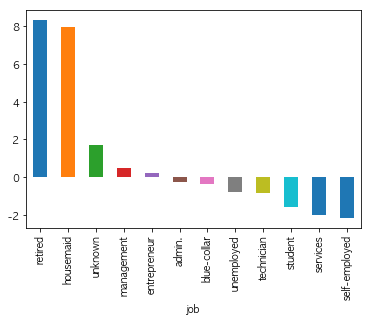

In [107]:
#result의 diff행 막대그래프 시각화
result.loc['diff'].plot.bar()
plt.show()

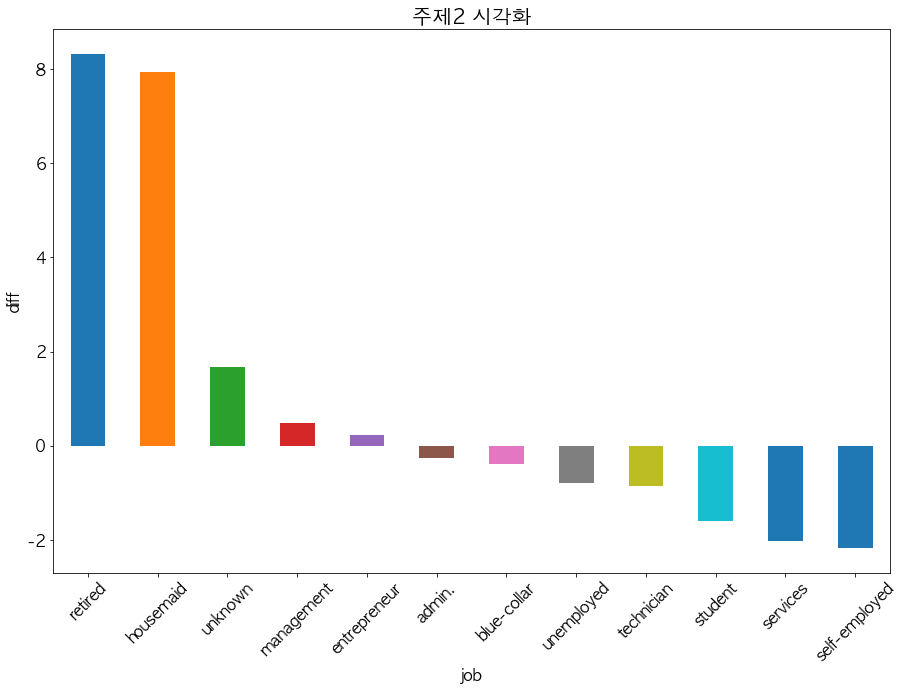

In [108]:
#result의 diff행 막대그래프 시각화
#figsize=[15,10]
#title('주제2 시각화',fontsize=20)
#x축 눈금 - fontsize=16,rotation=45
#y축 눈금 - fontsize=16)
#xlabel - 'job',fontsize=16
#ylabel - 'diff',fontsize=16

result.loc['diff'].plot.bar(figsize=[15,10])
plt.title('주제2 시각화',fontsize=20)
plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=16)
plt.xlabel('job',fontsize=16)
plt.ylabel('diff',fontsize=16)
plt.show()